In [234]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shm-data/ML DATA.csv


In [236]:
import warnings
warnings.filterwarnings("ignore")

In [237]:
#Load basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [238]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor,StackingRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import SGDRegressor

In [239]:
import sklearn
import xgboost
import imblearn
import numpy as np
import pandas as pd
import scipy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [240]:
#load the data

data=pd.read_csv('/kaggle/input/shm-data/ML DATA.csv')

In [241]:
data.head()

,bw,h,d,a/d,Unnamed: 4,f'c,fy,Lf,Df,Lf/Df,Vf,Vexp
0,152,229,197,2.8,1.3,29.1,463,30,0.5,60,0.50,1.73
1,152,229,197,3.6,1.3,29.1,463,30,0.5,60,0.50,1.51
2,152,229,197,2.8,1.3,29.9,463,30,0.5,60,0.75,2.02
3,152,229,197,2.8,2.0,29.9,463,30,0.5,60,0.75,2.19
4,152,229,197,2.8,1.3,20.6,463,30,0.5,60,0.75,1.50


In [242]:
data.columns = ['w', 'h', 'd','a/d','rho%','fc','fy','Lf','Df','Lf/Df','Vf','Vexp']

In [243]:
data.isna().sum()

w        0
h        0
d        0
a/d      0
rho%     0
fc       0
fy       0
Lf       0
Df       0
Lf/Df    0
Vf       0
Vexp     0
dtype: int64

In [244]:
X_data=data.drop('Vexp',axis=1)
y_data=data['Vexp'].copy()

In [245]:
data.describe()

,w,h,d,a/d,rho%,fc,fy,Lf,Df,Lf/Df,Vf,Vexp
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,166.028846,375.951923,322.711538,3.332692,2.475000,42.340385,490.653846,45.480769,0.665000,67.846154,0.833654,2.967212
std,29.620400,141.770523,128.590165,0.324544,0.645184,15.041641,64.759266,14.099494,0.146228,11.242058,0.300488,1.072474
min,125.000000,228.000000,180.000000,2.500000,1.200000,20.600000,415.000000,30.000000,0.380000,50.000000,0.500000,1.460000
25%,150.000000,300.000000,247.000000,3.300000,2.000000,29.825000,442.000000,30.000000,0.550000,60.000000,0.500000,2.185000
50%,152.000000,300.000000,251.000000,3.500000,2.700000,38.500000,475.000000,50.000000,0.700000,65.000000,0.750000,2.810000
75%,200.000000,457.000000,381.000000,3.500000,2.700000,50.800000,565.000000,60.000000,0.750000,80.000000,1.000000,3.352500
max,300.000000,700.000000,610.000000,4.000000,4.500000,91.400000,590.000000,60.000000,0.900000,100.000000,1.500000,7.280000


<AxesSubplot:>

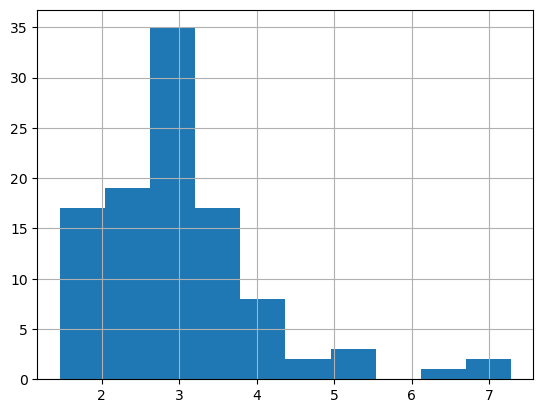

In [246]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
data['Vexp'].hist()

array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'h'}>,
        <AxesSubplot:title={'center':'d'}>],
       [<AxesSubplot:title={'center':'a/d'}>,
        <AxesSubplot:title={'center':'rho%'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'fy'}>,
        <AxesSubplot:title={'center':'Lf'}>,
        <AxesSubplot:title={'center':'Df'}>],
       [<AxesSubplot:title={'center':'Lf/Df'}>,
        <AxesSubplot:title={'center':'Vf'}>, <AxesSubplot:>]],
      dtype=object)

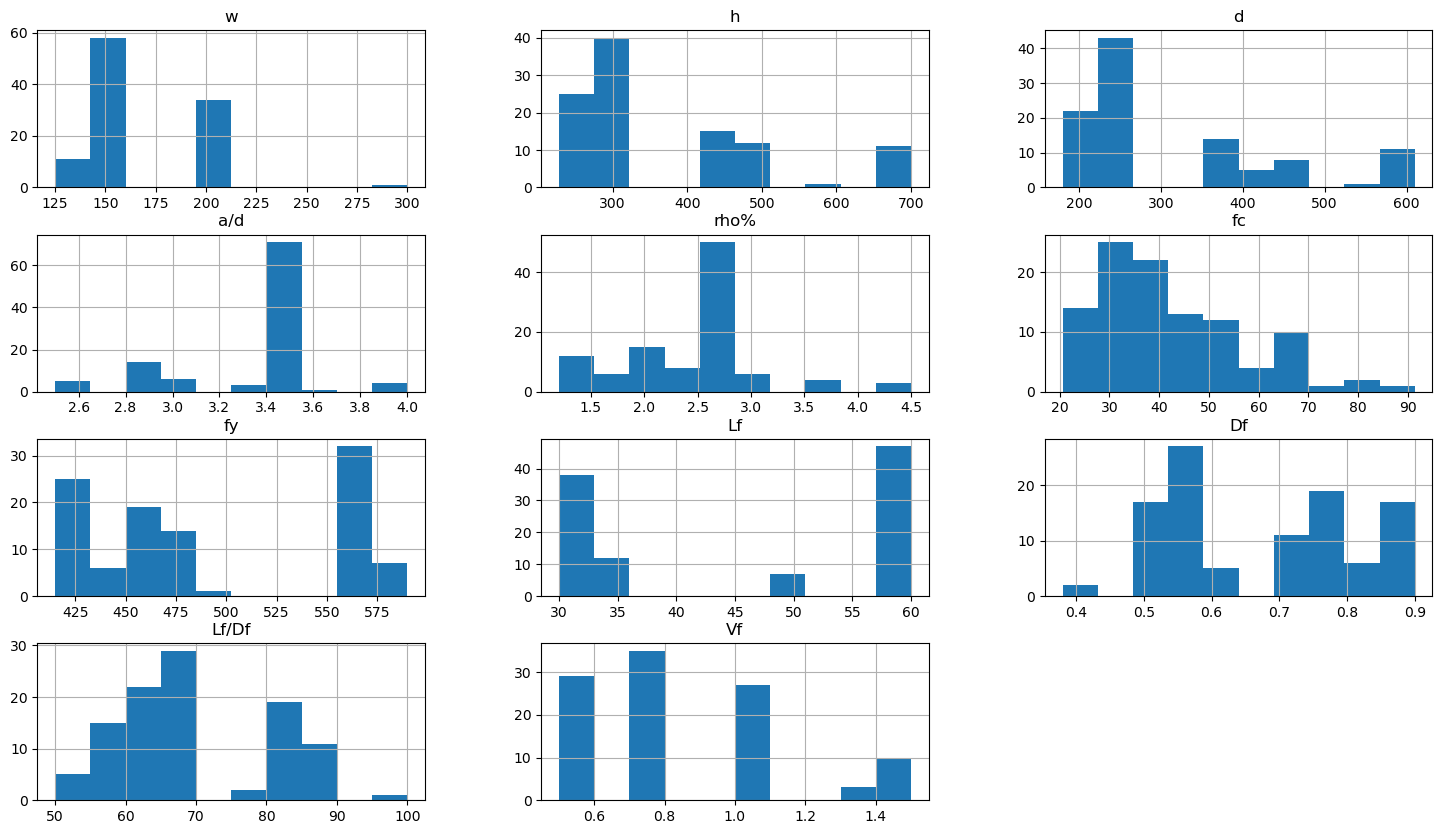

In [247]:
# Plotting histograms of multiple columns together
data.hist(['w', 'h', 'd','a/d','rho%','fc','fy','Lf','Df','Lf/Df','Vf'], figsize=(18,10))

In [248]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)

In [249]:
X_train=train_set.drop('Vexp',axis=1)
y_train=train_set['Vexp'].copy()

X_test=test_set.drop('Vexp',axis=1)
y_test=test_set['Vexp'].copy()

In [250]:
X_train.shape

(83, 11)

In [251]:
y_train.shape

(83,)

In [252]:
X_test.shape

(21, 11)

<AxesSubplot:>

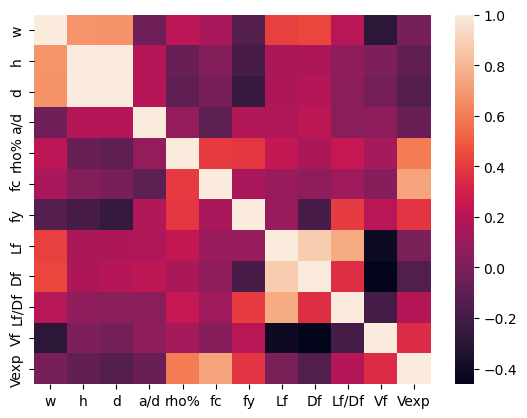

In [253]:
import seaborn as sns
sns.heatmap(data.corr())

In [254]:
corr_matrix=data.corr()
corr_matrix['Vexp']

w       -0.020713
h       -0.091742
d       -0.139091
a/d     -0.065704
rho%     0.596460
fc       0.733873
fy       0.379036
Lf      -0.004309
Df      -0.148056
Lf/Df    0.186065
Vf       0.347911
Vexp     1.000000
Name: Vexp, dtype: float64

In [255]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor

In [256]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "                 L1 (Lasso) Regression": Lasso(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor(),
    "                               Bagging": BaggingRegressor(),
    "                             xtratrees": ExtraTreesRegressor(),
    "                                histgb": HistGradientBoostingRegressor(),
    "                                sgd": SGDRegressor()
    
    
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    


                     Linear Regression trained.
                 L2 (Ridge) Regression trained.
                 L1 (Lasso) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                              AdaBoost trained.
                               Bagging trained.
                             xtratrees trained.
                                histgb trained.
                                sgd trained.


In [257]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2: 0.71364
                 L2 (Ridge) Regression R^2: 0.72392
                 L1 (Lasso) Regression R^2: 0.63406
Support Vector Machine (Linear Kernel) R^2: 0.69738
   Support Vector Machine (RBF Kernel) R^2: 0.08561
                         Decision Tree R^2: 0.67871
                        Neural Network R^2: 0.54719
                         Random Forest R^2: 0.75109
                     Gradient Boosting R^2: 0.82638
                              AdaBoost R^2: 0.79178
                               Bagging R^2: 0.67574
                             xtratrees R^2: 0.81377
                                histgb R^2: 0.59294
                                sgd R^2: -25531194801020676414673780736.00000


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rand_forest = RandomForestRegressor(random_state=0).fit(X_train, y_train)
# print(rand_forest.predict(X_test))
# print(rand_forest.predict_proba(X_test))
# rando_forest.score(X_test, y_test)
# rand_forest_revised = RandomForestClassifier()
# n_estimators = [1000,1500,2000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=rand_forest_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# grad_boost = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
# print(grad_boost.predict(X_test))
# print(grad_boost.predict_proba(X_test))
# grad_boost.score(X_test, y_test)
# grad_boost_revised = GradientBoostingRegressor()
# n_estimators = [1000,1500,2000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=grad_boost_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# ada_boost = AdaBoostRegressor(random_state=0).fit(X_train, y_train)
# print(ada_boost.predict(X_test))
# print(ada_boost.predict_proba(X_test))
# ada_boost.score(X_test, y_test)
# ada_boost_revised = AdaBoostRegressor()
# n_estimators = [1000,1500,2000]
# loss=['linear','square','exponential']
# # define grid search
# grid = dict(n_estimators=n_estimators,loss=loss)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=ada_boost_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from sklearn.ensemble import BaggingRegressor
# bag_reg = BaggingRegressor(random_state=0).fit(X_train, y_train)
# print(bag_reg.predict(X_test))
# print(bag_reg.predict_proba(X_test))
# bag_reg.score(X_test, y_test)
# bag_reg_revised = BaggingRegressor()
# n_estimators = [1000,1500,2000]
# # define grid search
# grid = dict(n_estimators=n_estimators)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=bag_reg_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# extra_tree = ExtraTreesRegressor(random_state=0).fit(X_train, y_train)
# print(extra_tree.predict(X_test))
# print(extra_tree.predict_proba(X_test))
# extra_tree.score(X_test, y_test)
# extra_tree_revised = ExtraTreesRegressor()
# n_estimators = [1000,1500,2000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=extra_tree_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [258]:
estimators = [('lr', Ridge()),('svr', LinearSVR())]
r1 = Ridge()
r2 = GradientBoostingRegressor()
r3 = DecisionTreeRegressor()

models1 = {
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor(),
    "                               Bagging": BaggingRegressor(),
    "                            ExtraTrees": ExtraTreesRegressor(),
    "                              Stacking": StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor()),
    "                                Voting": VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)]),
}

for name, model in models1.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                              AdaBoost trained.
                               Bagging trained.
                            ExtraTrees trained.
                              Stacking trained.
                                Voting trained.


In [259]:
for name, model in models1.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                         Decision Tree R^2: 0.75064
                         Random Forest R^2: 0.72420
                     Gradient Boosting R^2: 0.82619
                              AdaBoost R^2: 0.75724
                               Bagging R^2: 0.76847
                            ExtraTrees R^2: 0.81209
                              Stacking R^2: 0.47025
                                Voting R^2: 0.80359


In [265]:
x_predict = list(GBR1.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(80)

,predicted_values,original_values
30,2.122755,2.00
65,2.184818,2.73
64,2.184818,2.79
53,3.197410,2.53
45,2.181831,1.68
93,3.962482,4.73
91,3.212525,4.04
47,2.181831,2.74
10,2.460497,2.45
0,1.751832,1.73
